## Employee Attrition Problem

### The data is for company X which is trying to control attrition. There are two sets of data: “Existing employees” and “Employees who have left”. Following attributes are available for every employee: 
#### Satisfaction Level
#### Last evaluation
#### Number of projects
#### Average monthly hours
#### Time spent at the company
#### Whether they have had a work accident
#### Whether they have had a promotion in the last 5 years
#### Departments (column sales)
#### Salary
#### Whether the employee has left

### Objective:--

### 1. What type of employees are leaving? 

### 2. Determine which employees are prone to leave next. 

### Reading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Excel File containing 2 Worksheets-- 'Existing employees' & 'Employees who have left'

In [2]:
excelfile = pd.ExcelFile("employee_data.xlsx")

In [3]:
data_exist = pd.read_excel(excelfile,'Existing employees')  
data_exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
data_non_exist = pd.read_excel(excelfile,'Employees who have left')   
data_non_exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


### EXPLORATORY DATA ANALYSIS (EDA)

### Information of the Dataset(s)-- This will facilitate in checking whether there are any null values

In [5]:
data_exist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [6]:
data_non_exist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


### Description of the Dataset(s)

In [7]:
data_exist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Emp ID,11428,NaN,NaN,NaN,7812.34,3453.95,2001,4857.75,7714.5,10571.2,14211
satisfaction_level,11428,NaN,NaN,NaN,0.66681,0.217104,0.12,0.54,0.69,0.84,1
last_evaluation,11428,NaN,NaN,NaN,0.715473,0.162005,0.36,0.58,0.71,0.85,1
number_project,11428,NaN,NaN,NaN,3.78666,0.979884,2,3,4,4,6
average_montly_hours,11428,NaN,NaN,NaN,199.06,45.6827,96,162,198,238,287
time_spend_company,11428,NaN,NaN,NaN,3.38003,1.56235,2,2,3,4,10
Work_accident,11428,NaN,NaN,NaN,0.175009,0.379991,0,0,0,0,1
promotion_last_5years,11428,NaN,NaN,NaN,0.0262513,0.159889,0,0,0,0,1
dept,11428,10,sales,3126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,11428,3,low,5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_non_exist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Emp ID,3571,NaN,NaN,NaN,6500.44,6266.48,1,893.5,1786,12678.5,14999
satisfaction_level,3571,NaN,NaN,NaN,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571,NaN,NaN,NaN,0.718113,0.197673,0.45,0.52,0.79,0.9,1
number_project,3571,NaN,NaN,NaN,3.8555,1.81817,2,2,4,6,7
average_montly_hours,3571,NaN,NaN,NaN,207.419,61.2028,126,146,224,262,310
time_spend_company,3571,NaN,NaN,NaN,3.87651,0.977698,2,3,4,5,6
Work_accident,3571,NaN,NaN,NaN,0.0473257,0.212364,0,0,0,0,1
promotion_last_5years,3571,NaN,NaN,NaN,0.00532064,0.0727586,0,0,0,0,1
dept,3571,10,sales,1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,3571,3,low,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Measures of Dispersion-- Variance & Skewness

In [9]:
data_exist.var()

Emp ID                   1.192975e+07
satisfaction_level       4.713404e-02
last_evaluation          2.624561e-02
number_project           9.601722e-01
average_montly_hours     2.086912e+03
time_spend_company       2.440931e+00
Work_accident            1.443933e-01
promotion_last_5years    2.556442e-02
dtype: float64

In [10]:
data_non_exist.var()

Emp ID                   3.926883e+07
satisfaction_level       6.966086e-02
last_evaluation          3.907476e-02
number_project           3.305725e+00
average_montly_hours     3.745786e+03
time_spend_company       9.558932e-01
Work_accident            4.509859e-02
promotion_last_5years    5.293812e-03
dtype: float64

In [11]:
data_exist.skew()

Emp ID                   0.123678
satisfaction_level      -0.604517
last_evaluation         -0.039038
number_project           0.268208
average_montly_hours    -0.055305
time_spend_company       2.079303
Work_accident            1.710819
promotion_last_5years    5.927016
dtype: float64

In [12]:
data_non_exist.skew()

Emp ID                    0.270663
satisfaction_level        0.291881
last_evaluation          -0.013859
number_project            0.246333
average_montly_hours      0.055009
time_spend_company        0.529610
Work_accident             4.265576
promotion_last_5years    13.605448
dtype: float64

### UNIVARIATE ANALYSIS OF THE DATASET(S)

### 1. Salary V. Number of Employees

Text(0, 0.5, 'Number of Employees')

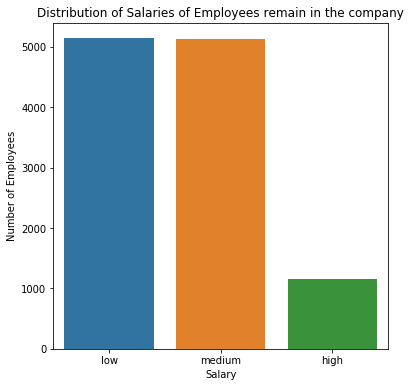

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data_exist['salary']);
plt.title('Distribution of Salaries of Employees remain in the company')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')

Text(0, 0.5, 'Number of Employees')

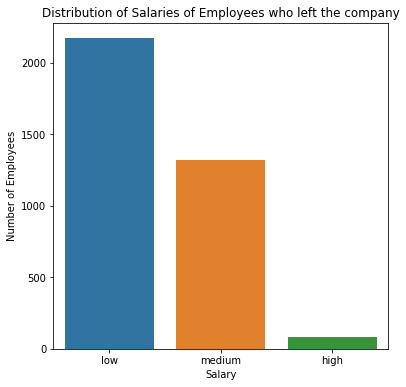

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data_non_exist['salary']);
plt.title('Distribution of Salaries of Employees who left the company')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')

### 2. Department V. Number of Employees

Text(0, 0.5, 'Number of Employees')

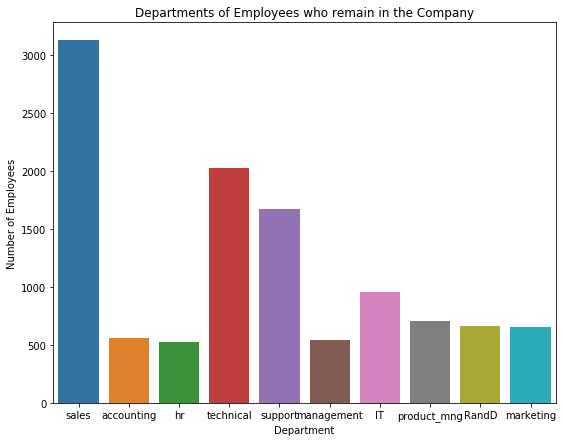

In [15]:
plt.figure(figsize=(9,7))
sns.countplot(data_exist['dept']);
plt.title('Departments of Employees who remain in the Company')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

Text(0, 0.5, 'Number of Employees')

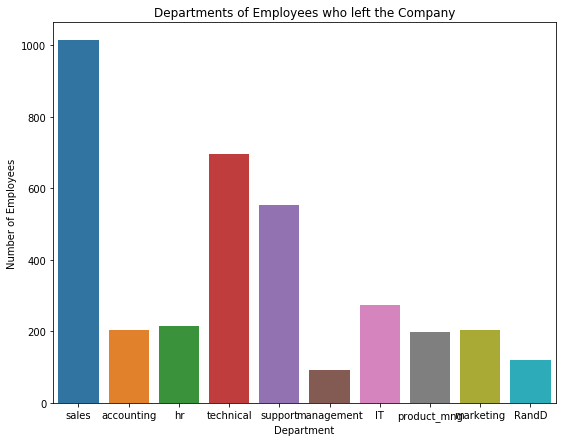

In [16]:
plt.figure(figsize=(9,7))
sns.countplot(data_non_exist['dept']);
plt.title('Departments of Employees who left the Company')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

### MULTIVARIATE ANALYSIS OF THE DATASET(S)

### 1. Department V. Satisfaction Level with respect to Promotion in the Last 5 Years

Text(0, 0.5, 'Satisfaction Level')

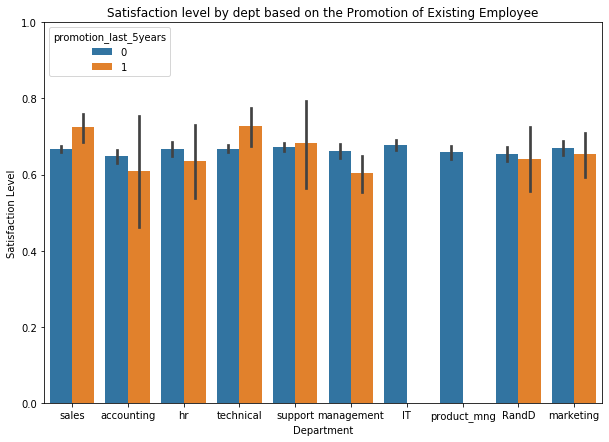

In [17]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.barplot(x='dept',y='satisfaction_level',hue='promotion_last_5years',data= data_exist);
plt.title('Satisfaction level by dept based on the Promotion of Existing Employee')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Satisfaction Level')

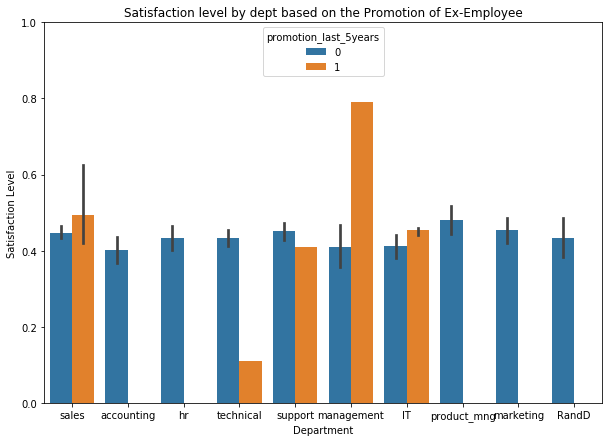

In [18]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.barplot(x='dept',y='satisfaction_level',hue='promotion_last_5years',data= data_non_exist);
plt.title('Satisfaction level by dept based on the Promotion of Ex-Employee')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

### 2. Department V. Last Evaluation with repsect to Work Accident

Text(0, 0.5, 'Last Evaluation')

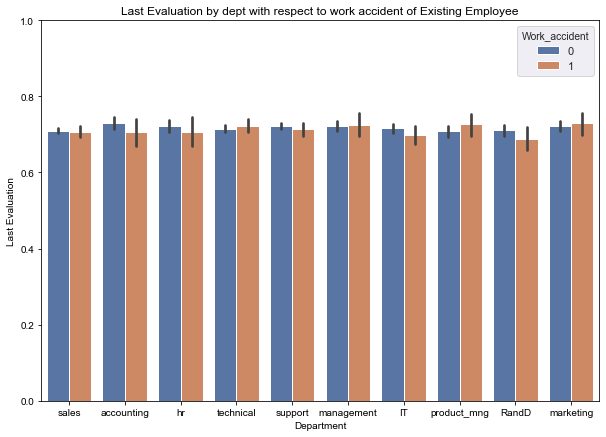

In [19]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.set(style='darkgrid')
sns.barplot(x='dept',y='last_evaluation',hue='Work_accident',data= data_exist);
plt.title('Last Evaluation by dept with respect to work accident of Existing Employee')
plt.xlabel('Department')
plt.ylabel('Last Evaluation')

Text(0, 0.5, 'Last Evaluation')

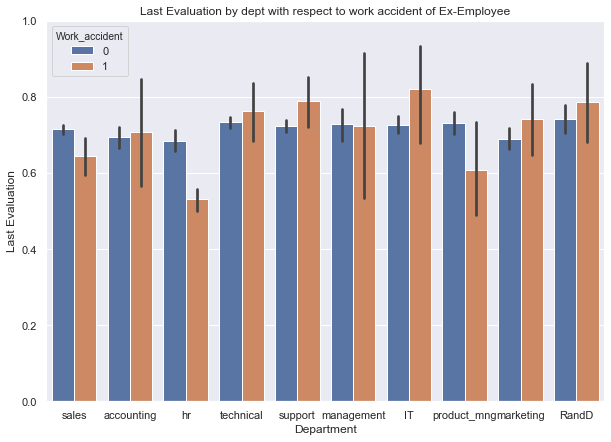

In [20]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.barplot(x='dept',y='last_evaluation',hue='Work_accident',data= data_non_exist);
plt.title('Last Evaluation by dept with respect to work accident of Ex-Employee')
plt.xlabel('Department')
plt.ylabel('Last Evaluation')

### 3. Department V. Satisfaction Level with respect to Salary

Text(0, 0.5, 'Satisfaction Level')

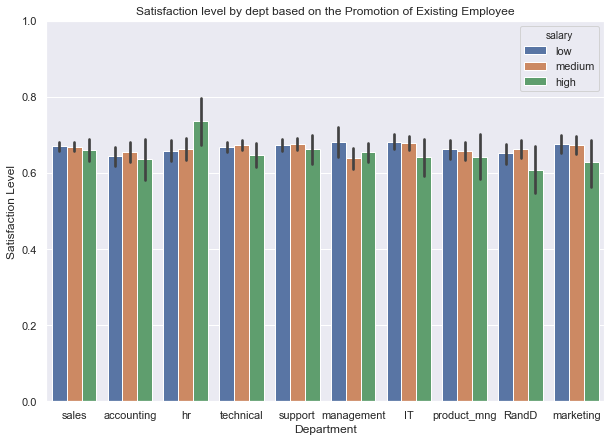

In [21]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data= data_exist);
plt.title('Satisfaction level by dept based on the Promotion of Existing Employee')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Satisfaction Level')

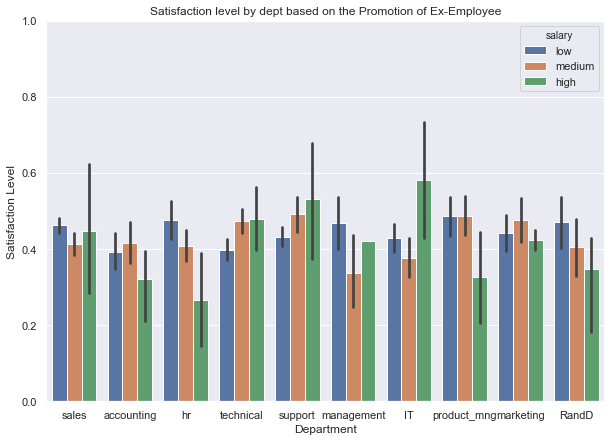

In [22]:
plt.figure(figsize=(10,7))
plt.ylim([0,1])
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data= data_non_exist);
plt.title('Satisfaction level by dept based on the Promotion of Ex-Employee')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')

### 4. Box Plot - Salary V. Average Montly Hours with respect to Number of Projects

Text(0, 0.5, 'Average Montly Hours')

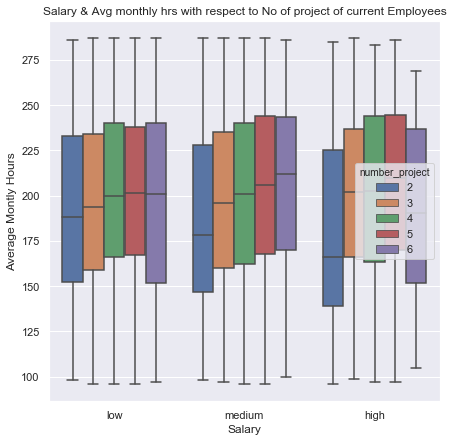

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(x='salary', y='average_montly_hours',hue='number_project',data=data_exist);
plt.title('Salary & Avg monthly hrs with respect to No of project of current Employees')
plt.xlabel('Salary')
plt.ylabel('Average Montly Hours')

Text(0, 0.5, 'Average Montly Hours')

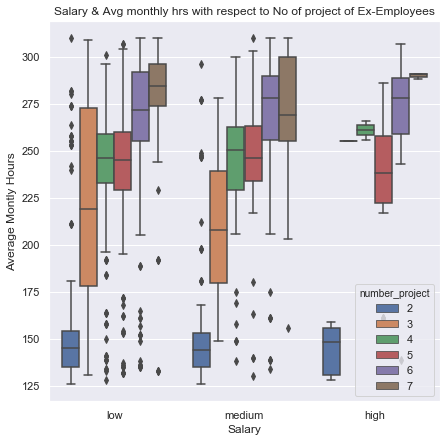

In [24]:
plt.figure(figsize=(7,7))
sns.boxplot(x='salary', y='average_montly_hours',hue='number_project',data=data_non_exist);
plt.title('Salary & Avg monthly hrs with respect to No of project of Ex-Employees')
plt.xlabel('Salary')
plt.ylabel('Average Montly Hours')

### 5. Salary V. Satisfaction Level with respect to Promotion in the Last 5 Years

Text(0, 0.5, 'Satisfaction Level')

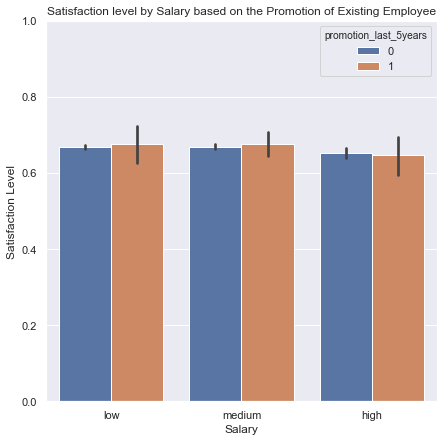

In [25]:
plt.figure(figsize=(7,7))
plt.ylim([0,1])
sns.barplot(x='salary',y='satisfaction_level',hue='promotion_last_5years',data= data_exist);
plt.title('Satisfaction level by Salary based on the Promotion of Existing Employee')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')

Text(0, 0.5, 'Satisfaction Level')

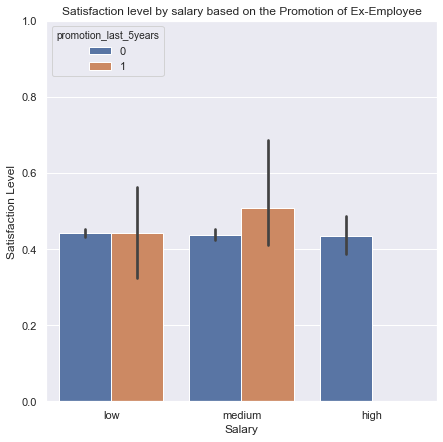

In [26]:
plt.figure(figsize=(7,7))
plt.ylim([0,1])
sns.barplot(x='salary',y='satisfaction_level',hue='promotion_last_5years',data= data_non_exist);
plt.title('Satisfaction level by salary based on the Promotion of Ex-Employee')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')

### THANK YOU